In [1]:
import pandas as pd 
import numpy as np 
from rdkit import Chem 
from rdkit.Chem import AllChem, Draw, Descriptors

In [22]:
sirovi_podaci=pd.read_csv('C:/Users/ivana/REPOZITORIJ/DATA/modeliranje-tutorial-master/modeliranje-tutorial-master/data/solubility.txt',delim_whitespace=True,names=['cas','smiles','logs'])

In [23]:
sirovi_podaci.head()

,cas,smiles,logs
0,60-35-5,CC(N)=O,1.58
1,60-34-4,CNN,1.34
2,64-19-7,CC(O)=O,1.22
3,123-75-1,C1CCCN1,1.15
4,127-07-1,NC([NH]O)=O,1.12


In [25]:
mol_column=sirovi_podaci.smiles.apply(Chem. MolFromSmiles).rename('mol', inplace=True)

In [26]:
logp=mol_column.apply(Descriptors.MolLogP).rename('logp', inplace=True) 
molwt=mol_column.apply(Descriptors.MolWt).rename('molwt', inplace=True) 
balabanj=mol_column.apply(Descriptors.BalabanJ).rename('balabanj', inplace=True) 
tpsa=mol_column.apply(Descriptors.TPSA).rename('tpsa', inplace=True)

In [28]:
final_data=pd.concat([sirovi_podaci, mol_column, logp, molwt, balabanj, tpsa], axis=1) 
final_data.head(4) 

,cas,smiles,logs,mol,logp,molwt,balabanj,tpsa
0,60-35-5,CC(N)=O,1.58,<rdkit.Chem.rdchem.Mol object at 0x00000120BA8...,-0.5084,59.068,2.803039,43.09
1,60-34-4,CNN,1.34,<rdkit.Chem.rdchem.Mol object at 0x00000120BA8...,-0.9205,46.073,1.632993,38.05
2,64-19-7,CC(O)=O,1.22,<rdkit.Chem.rdchem.Mol object at 0x00000120BA8...,0.0909,60.052,2.803039,37.30
3,123-75-1,C1CCCN1,1.15,<rdkit.Chem.rdchem.Mol object at 0x00000120BA8...,0.3698,71.123,2.083333,12.03


In [37]:
final_data.to_csv('C:/Users/ivana/REPOZITORIJ/DATA/modeliranje-tutorial-master/modeliranje-tutorial-master/data/solubility_all_data.csv')
if final_data.to_csv('C:/Users/ivana/REPOZITORIJ/DATA/modeliranje-tutorial-master/modeliranje-tutorial-master/data/solubility_all_data.csv') is None:
    print("Fajl je uspješno sačuvan.")


Fajl je uspješno sačuvan.


In [43]:
from sklearn.model_selection import train_test_split 
train_set,test_set=train_test_split(final_data,test_size=.2,random_state=42) 
train_set.shape, test_set.shape

((1048, 8), (263, 8))

In [45]:
train_set[['logp','molwt','tpsa','balabanj','logs']].corr()

,logp,molwt,tpsa,balabanj,logs
logp,1.000000,0.451401,-0.513134,-0.162983,-0.840738
molwt,0.451401,1.000000,0.412144,-0.359005,-0.639202
tpsa,-0.513134,0.412144,1.000000,-0.069396,0.185571
balabanj,-0.162983,-0.359005,-0.069396,1.000000,0.232376
logs,-0.840738,-0.639202,0.185571,0.232376,1.000000


array([[<AxesSubplot:xlabel='logp', ylabel='logp'>,
        <AxesSubplot:xlabel='molwt', ylabel='logp'>,
        <AxesSubplot:xlabel='tpsa', ylabel='logp'>,
        <AxesSubplot:xlabel='balabanj', ylabel='logp'>,
        <AxesSubplot:xlabel='logs', ylabel='logp'>],
       [<AxesSubplot:xlabel='logp', ylabel='molwt'>,
        <AxesSubplot:xlabel='molwt', ylabel='molwt'>,
        <AxesSubplot:xlabel='tpsa', ylabel='molwt'>,
        <AxesSubplot:xlabel='balabanj', ylabel='molwt'>,
        <AxesSubplot:xlabel='logs', ylabel='molwt'>],
       [<AxesSubplot:xlabel='logp', ylabel='tpsa'>,
        <AxesSubplot:xlabel='molwt', ylabel='tpsa'>,
        <AxesSubplot:xlabel='tpsa', ylabel='tpsa'>,
        <AxesSubplot:xlabel='balabanj', ylabel='tpsa'>,
        <AxesSubplot:xlabel='logs', ylabel='tpsa'>],
       [<AxesSubplot:xlabel='logp', ylabel='balabanj'>,
        <AxesSubplot:xlabel='molwt', ylabel='balabanj'>,
        <AxesSubplot:xlabel='tpsa', ylabel='balabanj'>,
        <AxesSubplot:xlabel=

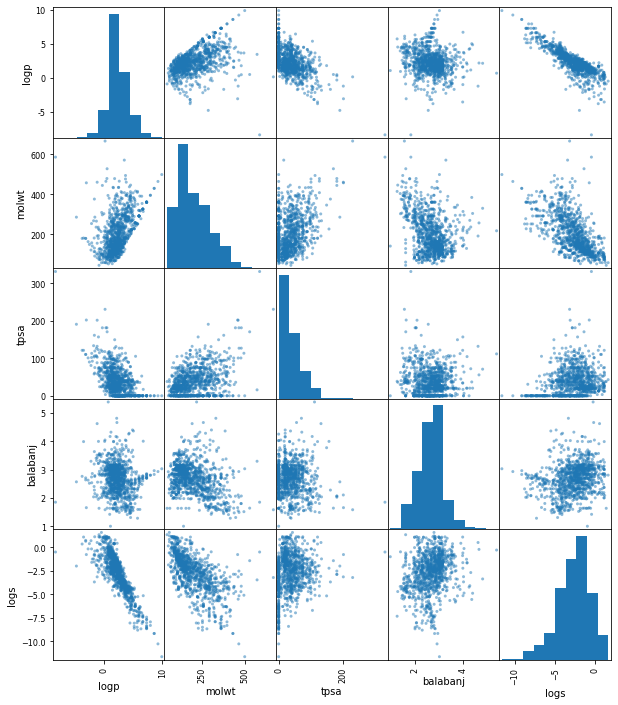

In [52]:
%matplotlib inline 
from pandas.plotting import scatter_matrix 
scatter_matrix(train_set[['logp','molwt','tpsa','balabanj','logs']],figsize=(10,12))

In [53]:
from sklearn.feature_selection import f_regression

In [54]:
help(f_regression)

Help on function f_regression in module sklearn.feature_selection._univariate_selection:

f_regression(X, y, *, center=True)
    Univariate linear regression tests.
    
    Linear model for testing the individual effect of each of many regressors.
    This is a scoring function to be used in a feature selection procedure, not
    a free standing feature selection procedure.
    
    This is done in 2 steps:
    
    1. The correlation between each regressor and the target is computed,
       that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
       std(y)).
    2. It is converted to an F score then to a p-value.
    
    For more on usage see the :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}  shape = (n_samples, n_features)
        The set of regressors that will be tested sequentially.
    
    y : array of shape(n_samples).
        The data matrix
    
    center : bool, default=True
      

In [59]:
featsel=f_regression(X=train_set[['logp','molwt','tpsa','balabanj']], y=train_set['logs']) 
F_values=featsel[0]
P_values=featsel[1]

In [63]:
P_values

array([5.79397574e-281, 1.94076230e-121, 1.42230093e-009, 2.57225427e-014])

In [64]:
from sklearn.linear_model import LinearRegression as linreg

In [65]:
xtrain=np.array(train_set.logp)[:, np.newaxis] 
ytrain=np.array(train_set.logs) 
xtest=np.array(test_set.logp)[:, np.newaxis] 
y_true=np.array(test_set.logs)

In [66]:
xtrain.shape, ytrain.shape, xtest.shape, y_true.shape

((1048, 1), (1048,), (263, 1), (263,))

In [67]:
fitter=linreg().fit(X=xtrain, y=ytrain) 
a=fitter.coef_ 
b=fitter.intercept_ 
a, b

(array([-0.95544944]), -0.5578596451697955)

In [68]:
y_pred=fitter.predict(X=xtest)

In [69]:
y_pred

array([-2.26008837, -1.68242364, -1.8683541 , -1.38738085, -2.14581661,
       -3.97378248, -1.33693312, -2.83593774, -3.71093834, -2.82848524,
       -2.57146934, -0.35301129, -3.00438348, -2.54739201, -0.77723084,
       -1.02631651, -2.17564575, -0.21982163, -3.58969181, -2.65516671,
        0.60864858, -1.25363704, -0.18160366, -6.25921754, -2.60118382,
       -6.76398148, -2.40273697, -2.22808081, -6.06415299, -5.93465137,
       -3.35723096, -2.4929314 , -1.69035387, -5.86368058, -1.91603102,
       -2.17753754, -5.53183388, -0.96717419, -3.76090835, -3.57192045,
       -5.94697667, -3.36296366, -3.03266478, -3.99967516, -3.80743874,
       -3.28245749, -0.17988385, -2.59277586, -6.60413479, -3.90776093,
       -2.26247699, -2.73036058, -0.37469999, -1.39015165, -3.8605044 ,
       -1.97364463, -2.62698095, -1.84045497, -3.06113718, -0.72917173,
       -3.73100278, -3.72249928, -1.90972506, -1.48177925, -3.37662658,
       -3.64271925, -1.59127376, -1.28533885, -4.91031402, -3.40

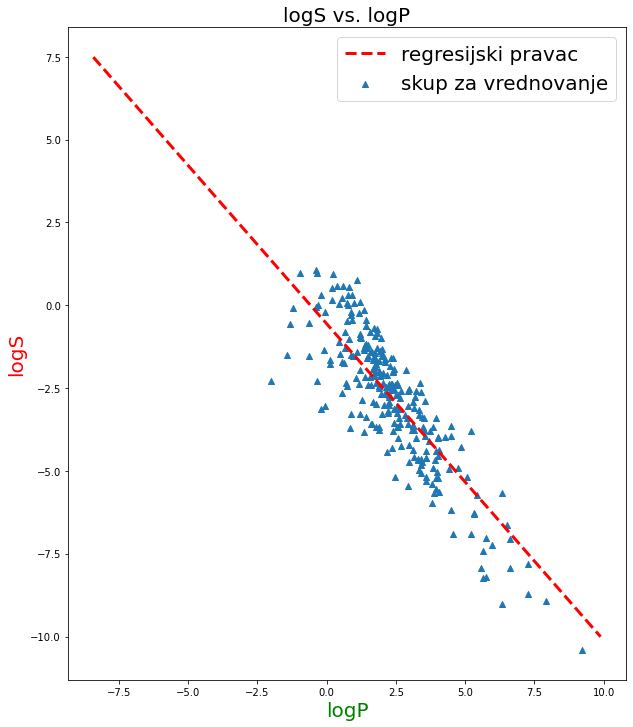

In [71]:
import matplotlib.pyplot as plt 
fig, ax =plt.subplots(figsize=(10,12)) 
plt.scatter(x=test_set.logp, y=test_set.logs, marker='^', label='skup za vrednovanje') 
x_space=np.array([min(train_set.logp),max(train_set.logp)]) 
y_fit=x_space*fitter.coef_ + fitter.intercept_ 
ax.plot(x_space,y_fit, linestyle='--', c='r', lw=3, label="regresijski pravac") 
plt.ylabel('logS', fontsize=20, color='red') 
plt.xlabel('logP', fontsize=20, color='green') 
plt.title('logS vs. logP', fontsize=20) 
plt.legend(fontsize=20)

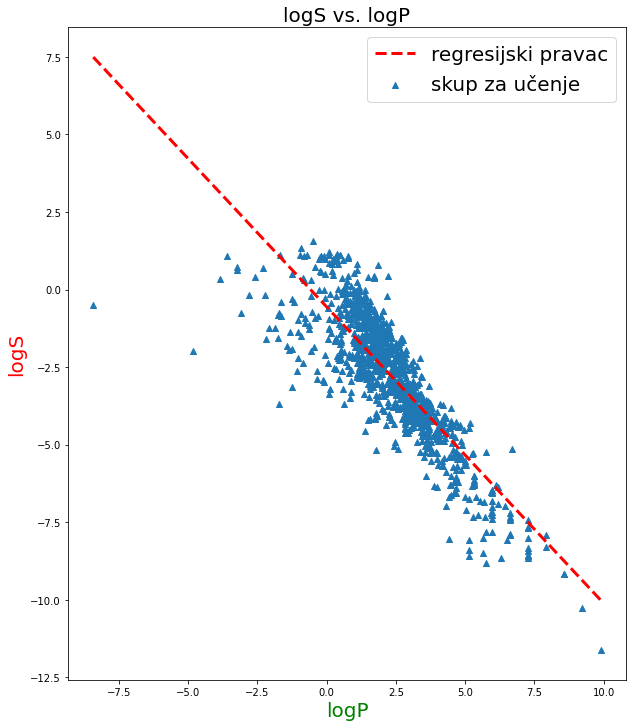

In [73]:
fig, ax =plt.subplots(figsize=(10,12)) 
plt.scatter(x=train_set.logp, y=train_set.logs, marker='^', label='skup za učenje') 
x_space=np.array([min(train_set.logp),max(train_set.logp)]) 
y_fit=x_space*fitter.coef_ + fitter.intercept_ 
plt.plot(x_space,y_fit, linestyle='--', c='r', lw=3, label="regresijski pravac") 
plt. ylabel('logS', fontsize=20, color='red') 
plt. xlabel('logP', fontsize=20, color='green') 
plt. title('logS vs. logP', fontsize=20) 
plt.legend(fontsize=20)

C:\Users\ivana\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


('MSE:', 1.0714057315580552)

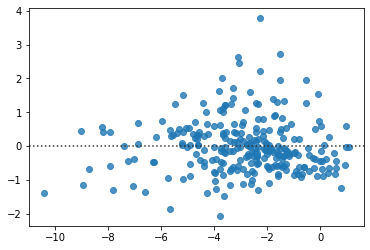

In [75]:
import seaborn as sns 
sns.residplot(y_true,y_pred) 
from sklearn.metrics import mean_squared_error as MSE

'MSE:',MSE(y_true, y_pred)

In [77]:
train_set[['logs','logp']].describe()

,logs,logp
count,1048.000000,1048.000000
mean,-2.714027,2.256705
std,2.031271,1.787395
min,-11.620000,-8.424200
25%,-3.960000,1.266550
50%,-2.435000,2.088900
75%,-1.320000,3.174225
max,1.580000,9.887600


<AxesSubplot:>

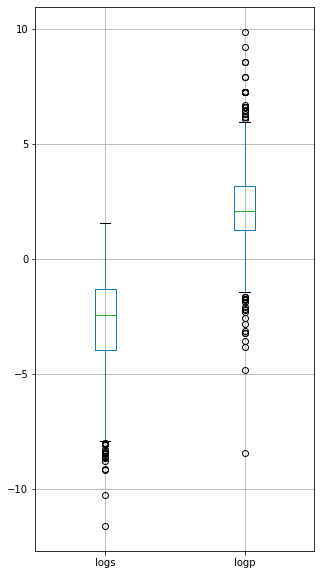

In [78]:
train_set[['logs','logp']].plot.box(figsize=(5,10), grid=True)

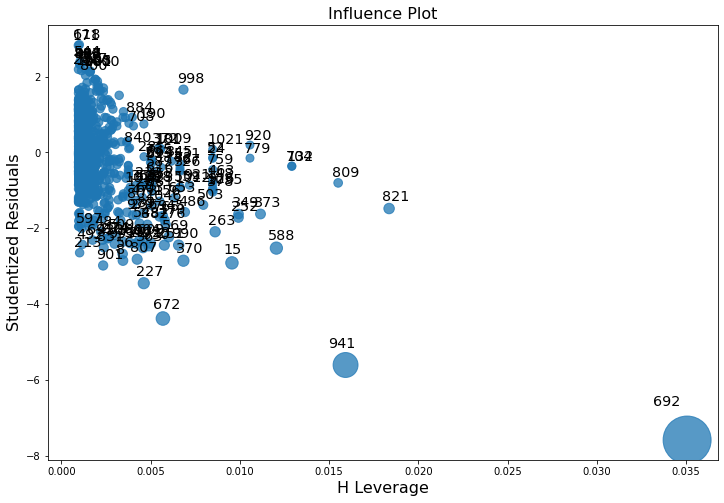

In [79]:
import statsmodels.api as sm 
x_sm=sm.add_constant(xtrain) 
model = sm.OLS(ytrain, x_sm) 
fitted_model = model.fit() 
fig, ax = plt.subplots(figsize=(12,8)) 
fig = sm.graphics.influence_plot(fitted_model, alpha = 0.05, ax=ax, criterion="cooks")

In [80]:
xtrain[941]

array([-4.8194])

In [81]:
xtrain[692]

array([-8.4242])

In [84]:
train_set[train_set.logp<-4.8] [['smiles','logp']]

,smiles,logp
105,NCCC(C(NC2CC(C(C(C2OC3OC(C(C(C3O)N)O)CO)O)OC1O...,-8.4242
1056,OC1(C2(C(NC(NC2=O)=O)=O)O)C(NC(NC1=O)=O)=O,-4.8194


In [85]:
outlier1=train_set.smiles.loc[1056] 
outlier2=train_set.smiles.loc[105]

In [86]:
o1_mol=Chem.MolFromSmiles(outlier1) 
AllChem.Compute2DCoords(o1_mol) 
print(Chem.MolToMolBlock(o1_mol))


     RDKit          2D

 20 21  0  0  0  0  0  0  0  0999 V2000
   -0.1603   -1.1950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6637   -0.3494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6637    0.3494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1213   -1.0791    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5872   -1.3970    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.5955   -0.2864    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1379    1.1421    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.6719    1.4600    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2143    2.8884    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.0614   -0.6043    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5535   -1.8830    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1603    1.1950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1213    1.0791    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5872    1.3970    0

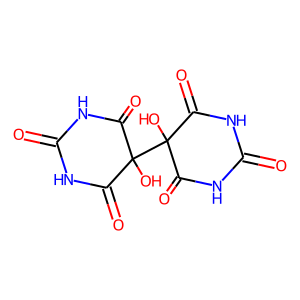

In [87]:
Draw.MolToImage(o1_mol) 
AllChem.Compute2DCoords(o1_mol) 
Draw.MolToImage(o1_mol)

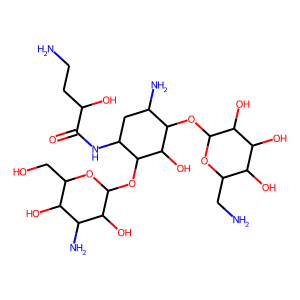

In [88]:
o2_mol=Chem.MolFromSmiles(outlier2) 
AllChem.Compute2DCoords(o2_mol) 
Draw.MolToImage(o2_mol)